In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler
from scipy import stats

In [2]:
# mudar para o caminho do seu drive
PATH = "data/titanic/train.csv"
titanic_df = pd.read_csv(PATH)

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Remoção dados


###remoção direta




In [4]:
remo_direta = titanic_df.dropna()
remo_direta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


###Seleção das colunas para remoção especifica


In [5]:
cols = ['Name','Ticket', 'Cabin']
remo_cols = titanic_df.drop(cols, axis=1)
remo_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [6]:
remo_cols = remo_cols.dropna()
remo_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


###Sem remoção de linhas com dados faltantes


In [7]:
fill_cols = titanic_df.copy()
cols = ['Name','Ticket', 'Cabin']
fill_cols = fill_cols.drop(cols, axis=1)
fill_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [8]:
fill_cols['Age'] = fill_cols['Age'].interpolate()
fill_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [9]:
fill_cols.dropna(inplace=True)
fill_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


#Transformação de váriaveis catégoricas em váriaveis númericas contínuas

##Criando variáveis extras

In [10]:
extra_var_ex = fill_cols.copy()
extra_var_ex.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [11]:
aux = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
  aux.append(pd.get_dummies(extra_var_ex[col]))
aux = pd.concat(aux, axis=1)
aux

,1,2,3,female,male,C,Q,S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,0,1
887,1,0,0,1,0,0,0,1
888,0,0,1,1,0,0,0,1
889,1,0,0,0,1,1,0,0


In [12]:
extra_var_ex = pd.concat((aux, extra_var_ex), axis=1)
extra_var_ex = extra_var_ex.drop(['Pclass', 'Sex', 'Embarked'], axis=1)
extra_var_ex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   1            889 non-null    uint8  
 1   2            889 non-null    uint8  
 2   3            889 non-null    uint8  
 3   female       889 non-null    uint8  
 4   male         889 non-null    uint8  
 5   C            889 non-null    uint8  
 6   Q            889 non-null    uint8  
 7   S            889 non-null    uint8  
 8   PassengerId  889 non-null    int64  
 9   Survived     889 non-null    int64  
 10  Age          889 non-null    float64
 11  SibSp        889 non-null    int64  
 12  Parch        889 non-null    int64  
 13  Fare         889 non-null    float64
dtypes: float64(2), int64(4), uint8(8)
memory usage: 55.6 KB


##Substituindo por valores contínuos


In [13]:
continuous_ex = fill_cols.copy()
continuous_ex.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [14]:
# Colunas para modificar: Embark, Sex
replace_map = { 'Embarked': {'C':0, 'Q': 1, 'S':2}, 'Sex': {'female':0, 'male':1}}
continuous_ex.replace(replace_map, inplace=True)
# replace_map = {}
# continuous_ex.replace(replace_map, inplace=True)
continuous_ex



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,22.5,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


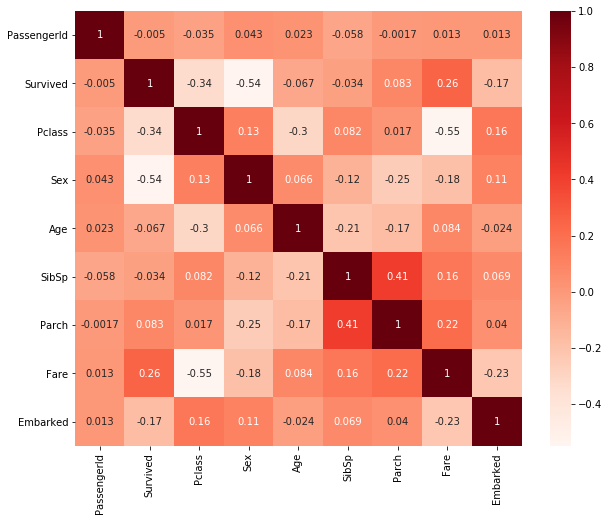

In [15]:
  corr = continuous_ex.corr()
  plt.subplots(figsize=(10,8))
  sns.heatmap(corr, annot=True, cmap=plt.cm.Reds,)

In [16]:
continuous_ex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


#Normalização

Nessa sessão nós normalizaremos a coluna "Fare" que é o valor da passagem dos passageiros

## Max norm


$\frac{X(i)}{max(X)}$

In [17]:
max_norm_df = continuous_ex.copy()
max_fare = max_norm_df['Fare'].max()
max_fare

512.3292

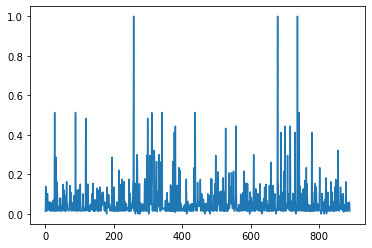

In [18]:
max_norm_df['Fare'] = max_norm_df['Fare']/max_fare
max_norm_df['Fare'].plot()

## Exercicios

### Min Max norm


$\frac{X(i)- min(X}{max(X)-min(X)}$

In [ ]:
min_max_norm_df = continuous_ex.copy()
fare_max = min_max_norm_df['Fare'].max()
fare_min = min_max_norm_df['Fare'].min()
fare_max, fare_min

(512.3292, 0.0)

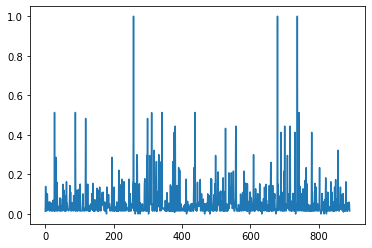

In [ ]:
min_max_norm_df['Fare'] = (min_max_norm_df['Fare']-fare_min)/(fare_max-fare_min)
min_max_norm_df['Fare'].plot()

### Z-score norm


**$\frac{i-\mu} {\sigma}$** \\
$\mu$ = média \\
$\sigma$ = desvio padrão


In [19]:
zscore_norm_df = continuous_ex.copy()
fare_mean = zscore_norm_df['Fare'].mean()
fare_std = zscore_norm_df['Fare'].std()
fare_mean, fare_std

(32.09668087739032, 49.697504316707956)

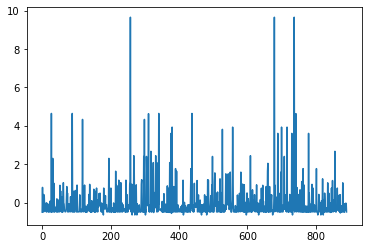

In [20]:
zscore_norm_df['Fare'] = (zscore_norm_df['Fare']-fare_mean)/fare_std
zscore_norm_df['Fare'].plot()

# com sklearn e scipy

In [23]:
min_max_norm_df = continuous_ex.copy()
fare_column = zscore_norm_df['Fare'].values.reshape(-1,1)
transformer = MaxAbsScaler().fit(fare_column)
fare_column = transformer.transform(fare_column)
fare_column

array([[-5.17388554e-02],
       [ 8.15992619e-02],
       [-5.03332863e-02],
       [ 4.37357286e-02],
       [-5.00729957e-02],
       [-4.92227826e-02],
       [ 4.11588519e-02],
       [-2.29507175e-02],
       [-4.36525642e-02],
       [-4.21854164e-03],
       [-3.20608877e-02],
       [-1.15499902e-02],
       [-5.00729957e-02],
       [-1.71100632e-03],
       [-5.04807149e-02],
       [-3.35185150e-02],
       [-6.18800427e-03],
       [-3.97654888e-02],
       [-2.93538657e-02],
       [-5.17909135e-02],
       [-1.26952687e-02],
       [-3.97654888e-02],
       [-5.01163081e-02],
       [ 7.08681521e-03],
       [-2.29507175e-02],
       [-1.47674480e-03],
       [-5.17909135e-02],
       [ 4.80815667e-01],
       [-5.04286568e-02],
       [-5.03940902e-02],
       [-9.11200450e-03],
       [ 2.38268161e-01],
       [-5.06976931e-02],
       [-4.49713004e-02],
       [ 1.04270571e-01],
       [ 4.14451715e-02],
       [-5.17821678e-02],
       [-5.00729957e-02],
       [-2.9

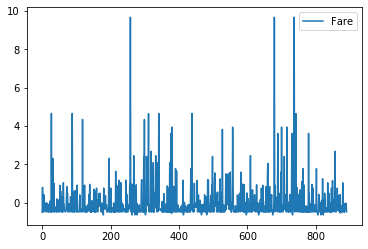

In [24]:
fare_column = stats.zscore(fare_column)
# fare_column
zscore_norm_df['Fare'] = fare_column
zscore_norm_df.plot.line(y='Fare')